# Exploratory Data Analysis on Unicorn Companies Dataset #


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [64]:
data = pd.read_csv("..\Unicorn_Companies_Dataset.csv")

In [65]:
data.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/2018,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/2019,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/2014,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/2017,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/2019,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [66]:
data.size

10740

In [67]:
data.shape

(1074, 10)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [69]:
data.describe(include='all')

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074.000000,1074,1073
unique,1073,30,639,16,256,46,6,NaN,539,1058
top,Bolt,$1B,7/13/2021,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,NaN,60,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.895717,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.698573,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN


In [70]:
data.isnull().any(axis=0)

Company             False
Valuation           False
Date Joined         False
Industry            False
City                 True
Country/Region      False
Continent           False
Year Founded        False
Funding             False
Select Investors     True
dtype: bool

In [71]:
data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [72]:
mask = data['City'].isnull()
data[mask]['Country/Region'].value_counts()

Singapore    12
Hong Kong     3
Bahamas       1
Name: Country/Region, dtype: int64

In [73]:
data.drop_duplicates().shape

(1074, 10)

In [74]:
data = data.dropna()
data.shape

(1057, 10)

In [75]:
data.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country/Region      0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [76]:
data.sort_values(by='Year Founded', ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
714,Yidian Zixun,$1B,10/17/2017,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
952,LayerZero Labs,$1B,3/30/2022,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
554,ClickHouse,$2B,10/28/2021,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
782,Phantom,$1B,1/31/2022,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
775,Jokr,$1B,12/2/2021,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
864,Aptos,$1B,3/15/2022,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
967,Mensa Brands,$1B,11/16/2021,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."
822,GlobalBees,$1B,12/28/2021,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
314,Flink Food,$3B,12/1/2021,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
396,candy.com,$2B,10/21/2021,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent..."


In [77]:
data['Year Founded'].value_counts().sort_values(ascending=False)

2015    151
2016    109
2014    107
2012     94
2013     85
2011     81
2017     74
2018     59
2019     44
2010     39
2009     34
2008     27
2020     24
2007     23
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2003      8
2004      8
1998      5
2002      4
1995      2
1994      2
1996      1
1919      1
1979      1
1992      1
1991      1
1990      1
1984      1
1993      1
1997      1
Name: Year Founded, dtype: int64

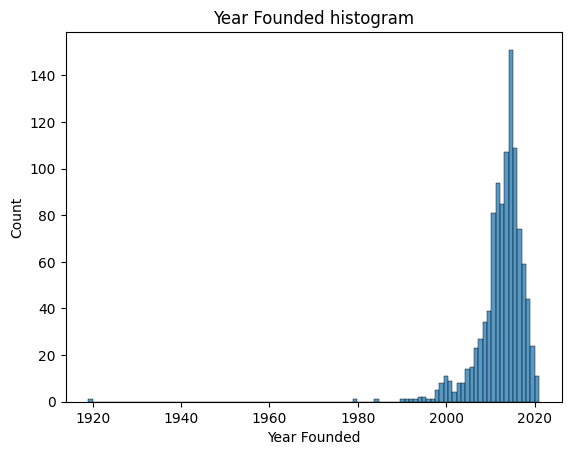

In [78]:
sns.histplot(data=data, x='Year Founded')
plt.title('Year Founded histogram')
plt.show()

In [79]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [80]:
data['Month Joined'] = data['Date Joined'].dt.month_name()
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [81]:
data['Years To Join'] = data['Date Joined'].dt.year - data['Year Founded']
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [82]:
data['Month Joined'].unique()

array(['April', 'December', 'July', 'January', 'May', 'February',
       'October', 'June', 'March', 'November', 'August', 'September'],
      dtype=object)

In [83]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 
               'December' ]
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


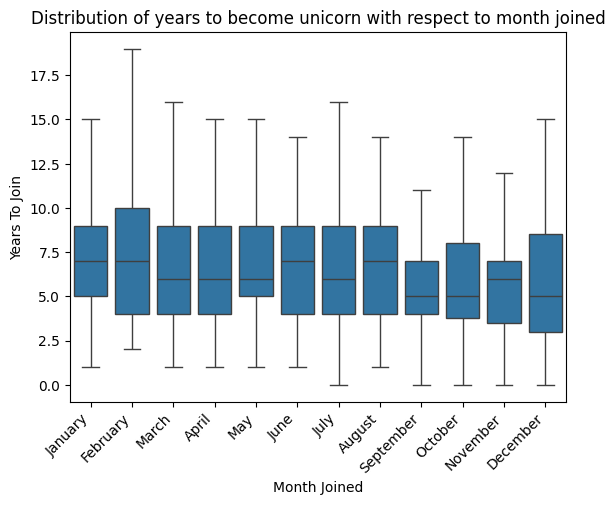

In [84]:
sns.boxplot(x=data['Month Joined'], 
            y=data['Years To Join'], 
            order=month_order, 
            showfliers=False)
plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

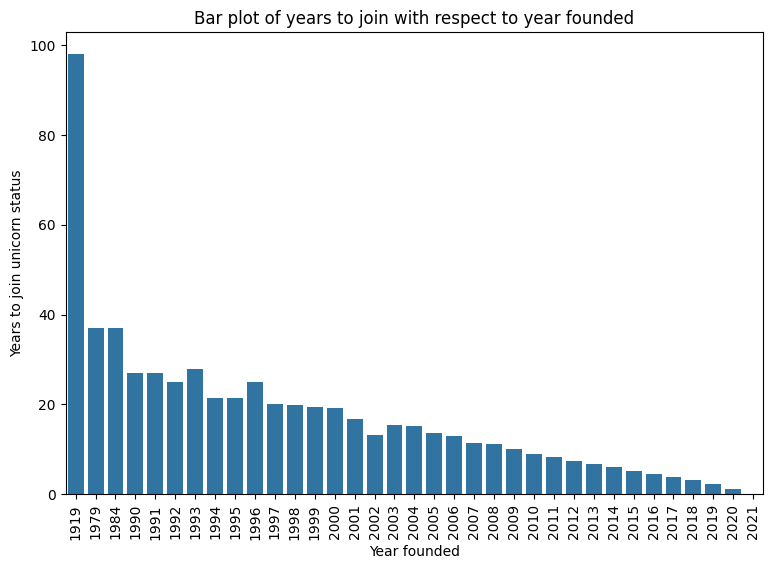

In [85]:
plt.figure(figsize=(9,6))
sns.barplot(x=data["Year Founded"], y=data["Years To Join"], errorbar=('ci', False))
plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()

In [86]:
data[data['Years To Join'] < 0]


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",October,-4


In [87]:
data.loc[data['Company']=='Yidian Zixun','Year Founded'] = 2017
data.loc[data['Company']=='Yidian Zixun','Year Founded']

714    2017
Name: Year Founded, dtype: int64

In [88]:
data['Years To Join'] = data['Date Joined'].dt.year - data['Year Founded']

In [89]:
data['Years To Join'].describe()

count    1057.000000
mean        7.023652
std         5.347968
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Join, dtype: float64

In [90]:
industry_list = sorted(data['Industry'].unique())

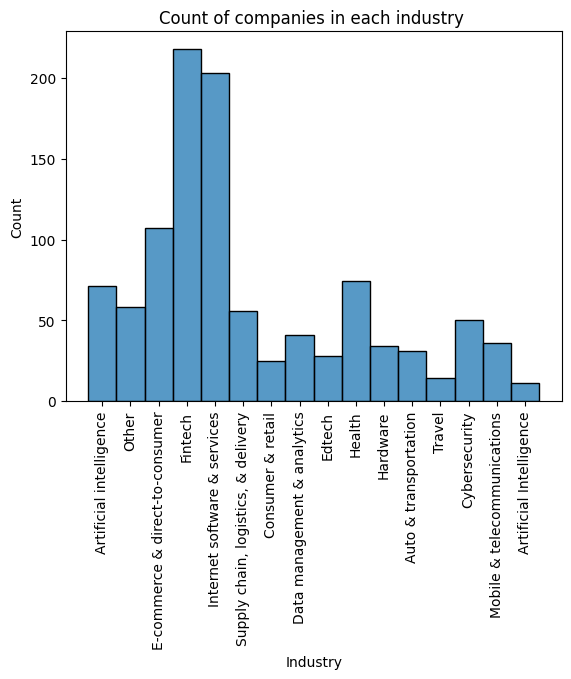

In [91]:
#plt.figure(figsize=(10,5))
sns.histplot(x=data['Industry'])
plt.title('Count of companies in each industry ')
plt.xticks(rotation=90)
plt.show()

In [92]:
data['Industry'] = data['Industry'].replace('Artificial Intelligence','Artificial intelligence')
set(data['Industry'])

{'Artificial intelligence',
 'Auto & transportation',
 'Consumer & retail',
 'Cybersecurity',
 'Data management & analytics',
 'E-commerce & direct-to-consumer',
 'Edtech',
 'Fintech',
 'Hardware',
 'Health',
 'Internet software & services',
 'Mobile & telecommunications',
 'Other',
 'Supply chain, logistics, & delivery',
 'Travel'}

In [93]:
duplicate_company = data['Company'].value_counts().reset_index().rename(columns={'index':'Company', 'Company':'Count'})
duplicate_company[duplicate_company.Count>1]

,Company,Count
0,Bolt,2


In [94]:
data[data.duplicated(subset=['Company'], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments",May,5
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic",October,7


In [95]:
data['Valuation'] = data['Valuation'].str.strip('$B').astype(float)

In [96]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [97]:
data.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Month Joined                object
Years To Join                int64
dtype: object

In [98]:
data['Valuation Category'] = pd.qcut(x=data['Valuation'],q=2,labels=['low','high'])

In [99]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5,high
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10,high
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10,high
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4,high
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6,high


In [100]:
data['Continent'].value_counts()

North America    588
Asia             294
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64

In [101]:
continent_dict = {'North America': 1,
                  'Asia': 2,
                  'Europe': 3,
                  'South America': 4,
                  'Oceania': 5,
                  'Africa': 6
                 }

In [102]:
data['Continent Rank'] = data['Continent'].replace(continent_dict)

In [103]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5,high,2
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10,high,1
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10,high,2
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4,high,1
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6,high,3


In [104]:
#data.groupby('Country/Region').agg({'Valuation': ['sum', 'mean'], 'Company': 'count'}).reset_index()
industry_data = data.groupby('Industry').agg(Valuation_Sum=('Valuation','sum'),
                                             Valuation_Mean=('Valuation','mean'),
                                             Company_Count=('Company','count')).sort_values(by='Valuation_Mean', ascending=False).reset_index()


In [136]:
industry_data.head(10).sort_values(by='Valuation_Sum',ascending=False)

,Industry,Valuation_Sum,Valuation_Mean,Company_Count
4,Fintech,843.0,3.866972,218
3,E-commerce & direct-to-consumer,420.0,3.925234,107
0,Artificial intelligence,372.0,4.536585,82
1,Other,252.0,4.344828,58
9,"Supply chain, logistics, & delivery",175.0,3.125000,56
6,Data management & analytics,136.0,3.317073,41
2,Consumer & retail,106.0,4.240000,25
5,Edtech,100.0,3.571429,28
8,Auto & transportation,99.0,3.193548,31
7,Travel,46.0,3.285714,14


In [106]:
country_valuations = data.groupby('Country/Region')['Valuation'].sum().sort_values(ascending=False).reset_index()


In [107]:
country_valuations.head(20)

,Country/Region,Valuation
0,United States,1933.0
1,China,695.0
2,India,196.0
3,United Kingdom,195.0
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0
9,South Korea,41.0


In [108]:
big_4_countries = ['United States', 'China', 'India', 'United Kingdom']
big_4_countries

['United States', 'China', 'India', 'United Kingdom']

In [109]:
no_big_4_countries = country_valuations[~country_valuations['Country/Region'].isin(big_4_countries)]

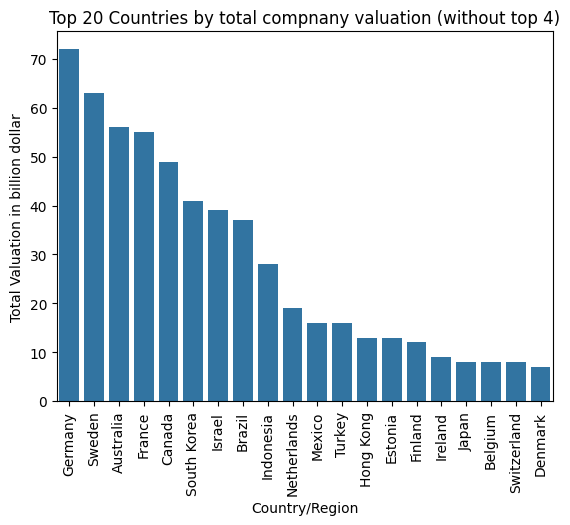

In [110]:
sns.barplot(x='Country/Region',
           y='Valuation',
           data = no_big_4_countries.head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Countries by total compnany valuation (without top 4)')
plt.ylabel('Total Valuation in billion dollar')
plt.show()

In [111]:
import plotly.express as px

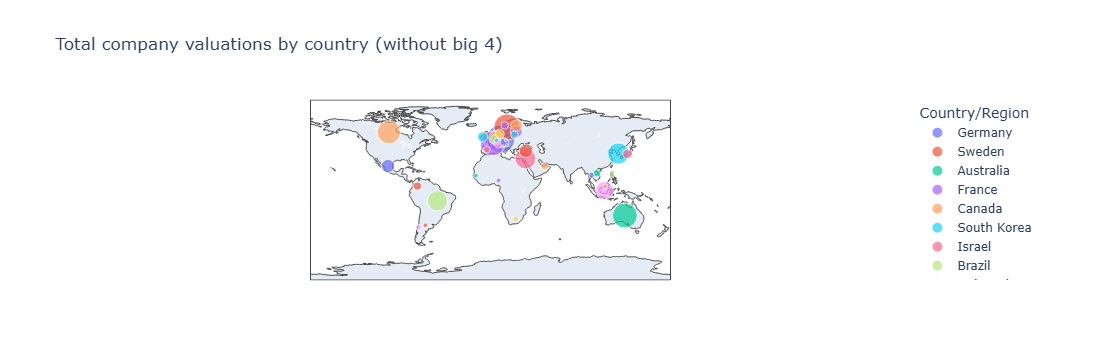

In [112]:
px.scatter_geo( no_big_4_countries, 
               locations='Country/Region', 
               size='Valuation', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (without big 4)')

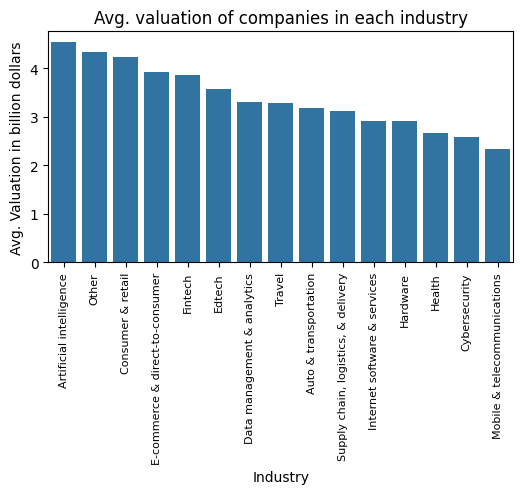

In [113]:
plt.figure(figsize=(6,3))
sns.barplot(x='Industry',           
               y='Valuation_Mean',
           errorbar=('ci',False),
            data=industry_data,
)
plt.title('Avg. valuation of companies in each industry')
plt.ylabel('Avg. Valuation in billion dollars')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [114]:
data_2021 = data[data["Date Joined"].dt.year == 2021]
data_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank
16,J&T Express,20.0,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6,high,2
24,Blockchain.com,14.0,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10,high,3
27,OpenSea,13.0,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4,high,1
34,Getir,12.0,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6,high,3
37,GoodLeap,12.0,2021-10-13,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",October,18,high,1


In [127]:
data_2021['Country/Region'].value_counts()

United States           303
China                    44
India                    34
United Kingdom           17
Germany                  16
Canada                   15
France                   11
Israel                   11
Brazil                    6
Mexico                    5
Indonesia                 4
Sweden                    4
Australia                 4
Norway                    3
Vietnam                   2
Japan                     2
Thailand                  2
Ireland                   2
Denmark                   2
Netherlands               2
Turkey                    2
Austria                   2
South Korea               2
Finland                   1
Switzerland               1
Czech Republic            1
Nigeria                   1
Philippines               1
Belgium                   1
Senegal                   1
Malaysia                  1
Spain                     1
Argentina                 1
Chile                     1
United Arab Emirates      1
Name: Country/Region

In [128]:
data_2021['Industry'].value_counts()

Fintech                                133
Internet software & services           117
E-commerce & direct-to-consumer         43
Health                                  40
Artificial intelligence                 35
Cybersecurity                           27
Supply chain, logistics, & delivery     24
Other                                   21
Data management & analytics             21
Hardware                                14
Edtech                                  12
Consumer & retail                        7
Mobile & telecommunications              6
Auto & transportation                    4
Travel                                   3
Name: Industry, dtype: int64

In [115]:
data_2021.insert(3,'Week Joined',data['Date Joined'].dt.strftime('%Y-W%V'))

In [116]:
data_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank
16,J&T Express,20.0,2021-04-07,2021-W14,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6,high,2
24,Blockchain.com,14.0,2021-02-17,2021-W07,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10,high,3
27,OpenSea,13.0,2021-07-20,2021-W29,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4,high,1
34,Getir,12.0,2021-03-26,2021-W12,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6,high,3
37,GoodLeap,12.0,2021-10-13,2021-W41,Internet software & services,Roseville,United States,North America,2003,$800M,"New Enterprise Associates, BDT Capital Partner...",October,18,high,1


In [117]:
data_by_week_2021 = data_2021.groupby('Week Joined')['Company'].count().reset_index().rename(columns={'Company':'Company Count'})
data_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [118]:
data_2020 = data[data["Date Joined"].dt.year == 2020]
data_2020.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank
22,Genki Forest,15.0,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,high,2
23,goPuff,15.0,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,high,1
38,Xingsheng Selected,12.0,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,high,2
54,Figma,10.0,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,high,1
57,Notion Labs,10.0,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,high,1


In [119]:
data_2020_2021 = pd.concat([data_2020, data_2021.drop('Week Joined',axis=1)])
data_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank
22,Genki Forest,15.0,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,high,2
23,goPuff,15.0,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,high,1
38,Xingsheng Selected,12.0,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,high,2
54,Figma,10.0,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,high,1
57,Notion Labs,10.0,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,high,1


In [120]:
data_2020_2021['Quarter Joined'] = data_2020_2021['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [121]:
data_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Valuation Category,Continent Rank,Quarter Joined
22,Genki Forest,15.0,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,high,2,2020-Q1
23,goPuff,15.0,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,high,1,2020-Q4
38,Xingsheng Selected,12.0,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,high,2,2020-Q3
54,Figma,10.0,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,high,1,2020-Q2
57,Notion Labs,10.0,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,high,1,2020-Q2


In [122]:
data_by_quarter_2020_2021 = data_2020_2021.groupby('Quarter Joined')['Valuation'].mean().reset_index().rename(columns={'Valuation':'Avg. Valuation'})
data_by_quarter_2020_2021.head()

,Quarter Joined,Avg. Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.764706
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.766355


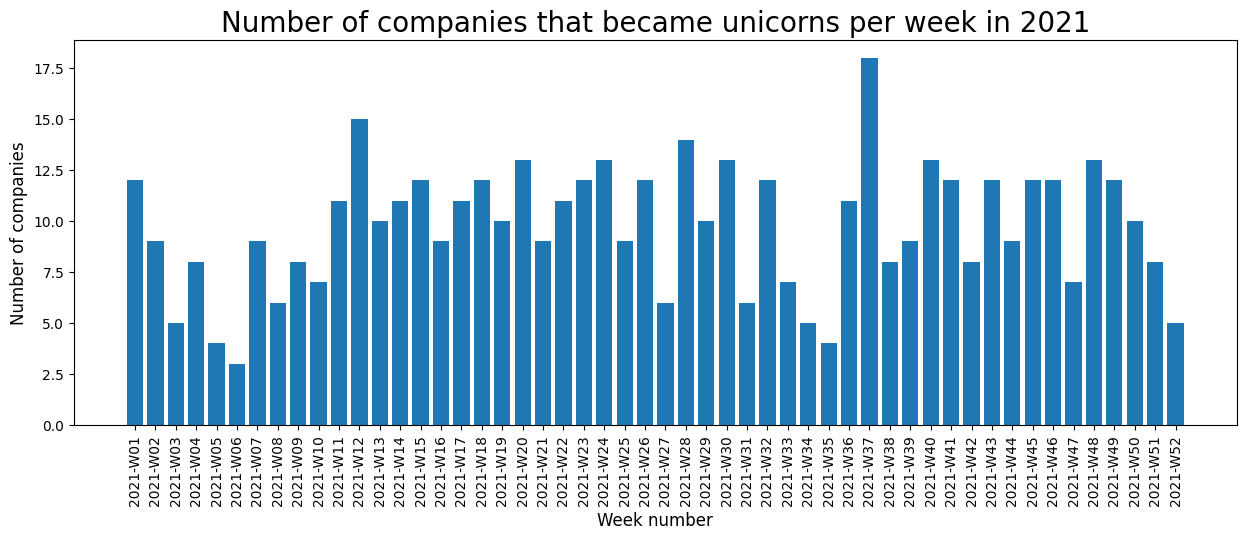

In [123]:
plt.figure(figsize = (15, 5))
plt.bar(x=data_by_week_2021['Week Joined'],height=data_by_week_2021['Company Count'])
plt.plot()
plt.xlabel("Week number", fontsize=12)
plt.ylabel("Number of companies", fontsize=12)
plt.title("Number of companies that became unicorns per week in 2021", fontsize=20)
plt.xticks(rotation = 90, horizontalalignment='center', fontsize=10)
plt.show()

In [124]:
data_by_quarter_2020_2021['Quarter Number'] = data_by_quarter_2020_2021['Quarter Joined'].str[-2:]
data_by_quarter_2020_2021['Year Joined'] = data_by_quarter_2020_2021['Quarter Joined'].str[:4]
data_by_quarter_2020_2021.head()

,Quarter Joined,Avg. Valuation,Quarter Number,Year Joined
0,2020-Q1,3.444444,Q1,2020
1,2020-Q2,3.764706,Q2,2020
2,2020-Q3,3.896552,Q3,2020
3,2020-Q4,3.697674,Q4,2020
4,2021-Q1,2.766355,Q1,2021


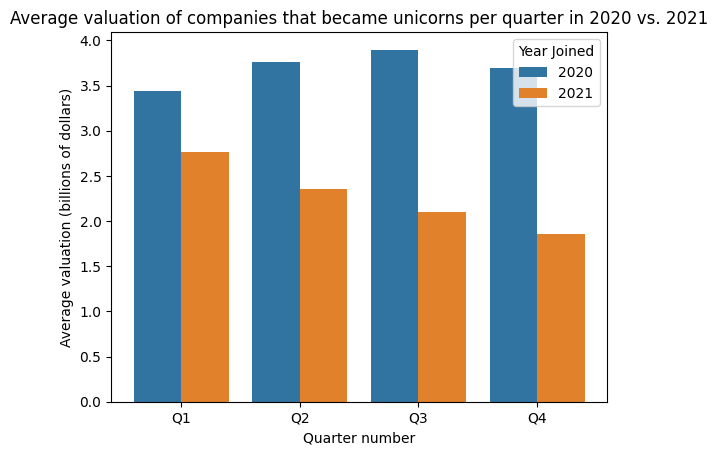

In [125]:
sns.barplot(x=data_by_quarter_2020_2021['Quarter Number'],
            y=data_by_quarter_2020_2021['Avg. Valuation'],
            hue=data_by_quarter_2020_2021['Year Joined']
           )
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

plt.show()